# 4. 인공신경망

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y = (x**2) + 3
y_noise = y + noise

model = nn.Sequential(
        nn.Linear(1, 6),
        nn.ReLU(),
        nn.Linear(6, 10),
        nn.ReLU(),
        nn.Linear(10, 6),
        nn.ReLU(),
        nn.Linear(6, 1),
    )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

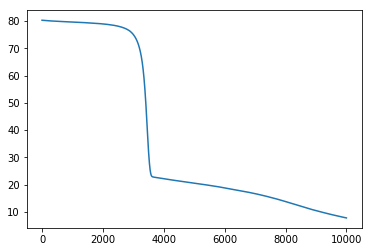

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_array)
plt.show()